# MGFD25 Assignment 2:
## Predicting loan failures (Total 50 pts)

### Please rename the file to Legal First Name_Legal Last Name_Student ID_A2.ipynb

***Please use the LENDING CLUB dataset for the assignment***

#### Let's import the data file

In [63]:
# First we will import Panadas and other useful libraries
import numpy as np
import pandas as pd

In [64]:
# Let's read the data file into a Pandas dataframe
# in this tutorial, I will use the Prosper dataset, while in your assignment, please use the LendingClub dataset
df = pd.read_csv('lendingclub.csv')


It looks like there is a warning with column 7: "DtypeWarning: Columns (7) have mixed types".  Let's keep that in mind, and we'll fix that later.  Let's first get familiar with the dataset.

# Data exploration (Data Understanding)

Data exploration aims to understand what data exists in a dataset, its characteristics, and the relationship between elements of the data.  
Data exploration has the following stages:
1. Variable identification
2. Data structuring
3. Univariate analysis
4. Bivariate analysis
5. Missing value analysis
6. Outlier analysis

### Initial Exploration: Variable identification (7pts)
When you are sourcing data, you will often find that the table names and variables names have little meaning.

Without complete metadata, it is challenging to use the data. The alternative is speaking with the owner or creator of the data, but there are obvious concerns.

The purpose of this exercise is to understand the data, their types, and their limitations.  We'll look at each variable and do a philosophical analysis about its meaning and importance for this problem.

In [65]:
# Let's take a look at the first few rows
df.tail()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,loan_status_description,data_source
1961522,130135401,12000.0,36,0.1198,398.46,B,2018-04-01,major_purchase,CURRENT,Lending Club
1961523,129961614,3000.0,36,0.2039,112.09,D,2018-04-01,other,CURRENT,Lending Club
1961524,130056422,14000.0,36,0.1601,492.27,C,2018-04-01,debt_consolidation,CURRENT,Lending Club
1961525,130065381,7500.0,36,0.1090,245.19,B,2018-04-01,other,CURRENT,Lending Club
1961526,129555354,35000.0,36,0.0607,1065.88,A,2018-04-01,debt_consolidation,CURRENT,Lending Club


In [66]:
df.shape

(1961527, 10)

In [67]:
df.columns

Index(['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961527 entries, 0 to 1961526
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 149.7+ MB


Luckily, the column names are very intuitive.  Otherwise, you'll need to invest time in searching for the correct data explanation.
Based on the initial exploration and your understanding of the business, which 2 features do you think will be the least important to predicting bad loans?  

Please include your answer within the notebook.

The least important features to predicting bad loans are **loan_number** and **data_source** as these 2 features do not provide any relevant information about borrower risk or financial behavior.


Which column is the 'target'?

The 'target' is **loan_status_description** because it indicates the status of the loan, such as "CURRENT", "COMPLETED", etc.

### Univariate Analysis (16pts)
Univariate analysis is about understanding each variable individually. These are the statistics you are probably most familiar with: mean, mode, median, max, min, quartiles, standard deviation, and frequency.
These can be visualized using
* histograms
* box plots
* line charts for time series variables

I only went over 3 of 10 features in the demo.  You will repeat the similar steps to get familiar with the rest of the features and the target.
Here are some questions that you'll ask when you are going through each column:

* How is the data distributed? Are there any interesting patterns?
* Are there data outliers?
* Is the data balanced?

List out 4 observations that you think are interesting.  Please provide the visualization or the statistical summary of your selected observations.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961527 entries, 0 to 1961526
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 149.7+ MB


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df['borrower_rate'].describe()

,borrower_rate
count,1.961527e+06
mean,1.313302e-01
std,4.797472e-02
min,5.310000e-02
25%,9.670000e-02
50%,1.269000e-01
75%,1.599000e-01
max,3.099000e-01


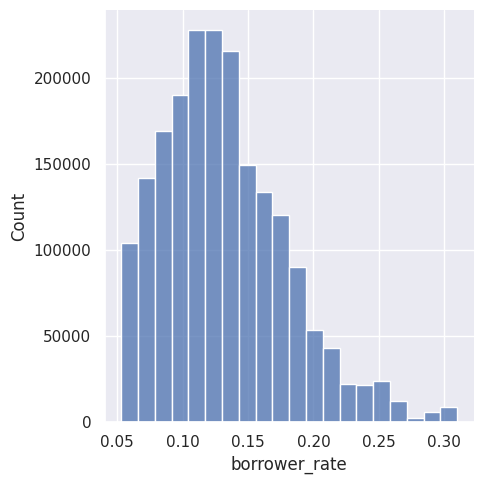

In [72]:
sns.displot(df['borrower_rate'], bins = 20)

**Key Takeaways:**

The **histogram** shows the **relationship between borrower rate and count**.  As seen, it follows a **right-skewed distribution**, meaning most loans have lower interest rates, but a small number have much higher rates. The highest count of borrower rates is between 0.10 and 0.15, with a **peak around 0.14-0.15**. Also, the **tail extending beyond 0.25** with low count suggests the **existence of outliers**.  All in all, the data is **not perfectly balanced** as the graph is right skewed with more loans at lower interest rates (0.10 - 0.15) compared to higher rates, suggesting that most borrowers qualify for moderate rates, while very few of them receive very high rates.

<Axes: xlabel='borrower_rate'>

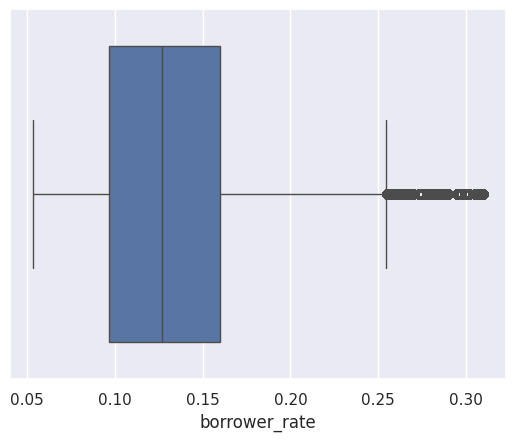

In [73]:
sns.boxplot(x=df['borrower_rate'])

**Key Takeaways:**

The graph shown is a box plot of **borrower rate**.  Consistent with the "Borrower Rate and Count" graph, from this box plot, we can infer that the **median** of the borrower rate is around **0.14-0.15**, meaning half of the borrower rates are below this value, and half are above. The interquartile range (the box) spans approximately **0.10 to 0.18**, covering the middle 50% of the data and implying that these are the **most common rates** given to borrowers.  The **data mostly fall between 0.05 and 0.26**, with **several outliers** beyond the line, shown by the **individual dots**. Lastly, the data is **skewed towards lower borrower rates**.

In [74]:
df['installment'].describe()

,installment
count,1.961527e+06
mean,4.456971e+02
std,2.649765e+02
min,4.930000e+00
25%,2.538800e+02
50%,3.797600e+02
75%,5.909550e+02
max,1.719830e+03


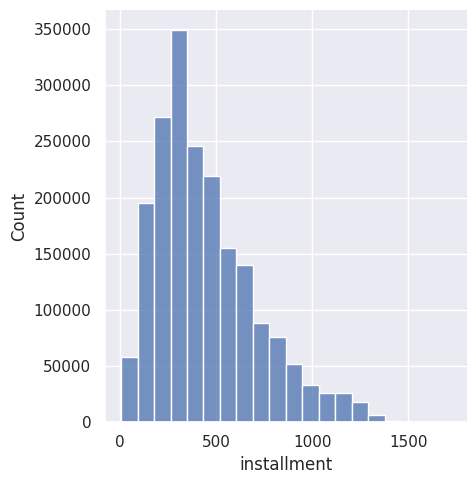

In [75]:
sns.displot(df['installment'], bins = 20)

**Key Takeaways:**

The histogram depicts the **relationship between count and installment**. It follows a **right-skewed distribution** with high concentration between 100 and 500 and a peak around 300-400.  A gradual decline is seen for higher installment amounts, meaning fewer borrowers take loans with high monthly payments. From this graph, we can infer that there is a **possibility of data outliers**, specifically for installments above $1000.  As the majority of borrowers fall within the lower installment range, the **data is not perfectly balanced.**

In [76]:
df['grade'].describe()

,grade
count,1961527
unique,7
top,B
freq,580531


<ipython-input-77-bb7e4fcd9f8d>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(0, 0, 'B'),
 Text(1, 0, 'A'),
 Text(2, 0, 'E'),
 Text(3, 0, 'C'),
 Text(4, 0, 'D'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G')]

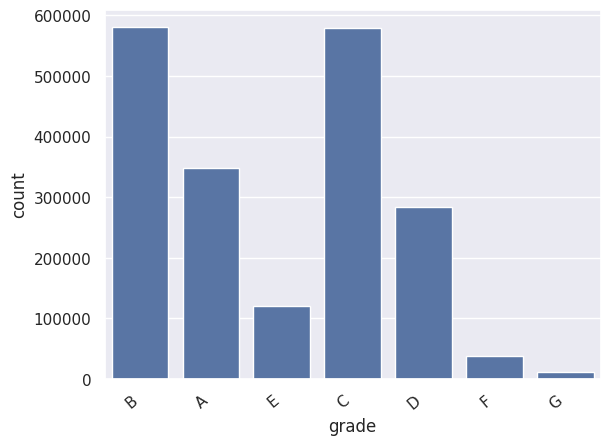

In [77]:
ax = sns.countplot(x=df['grade'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

**Key Takeaways:**

The histogram shows the **distribution of loan grades and their count**. We can see that grades B and C have the highest loan counts, this means that most of the loans are low-risk. On the other hand, loans from Grade D and above drops in counts significantly. This shows that most high risk borrowers are not approved for loans. In summary, these data are not distributed equally as we see most counts are in Grade A to C.

In [78]:
df['listing_title'].describe()

,listing_title
count,1961527
unique,14
top,debt_consolidation
freq,1117683


<ipython-input-79-38464aae0f8d>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'home_improvement'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'other'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'small_business'),
 Text(6, 0, 'house'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'car'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding'),
 Text(13, 0, 'educational')]

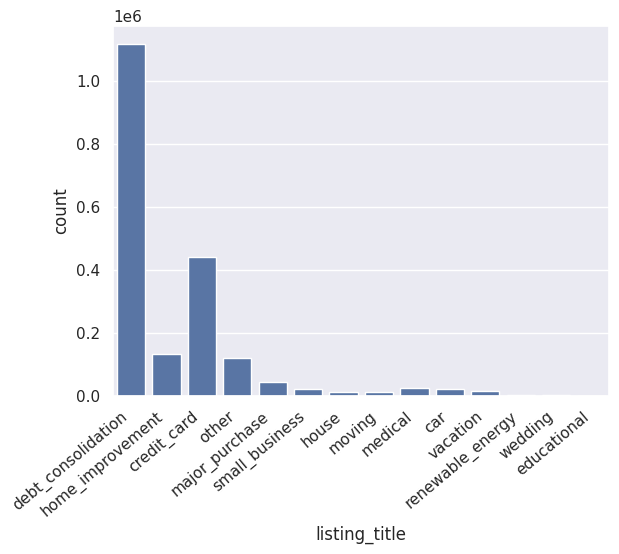

In [79]:
ax = sns.countplot(x=df['listing_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Key Takeaways:

The histogram shows the distribution of loan listing titles and their count. As we can see, most of the listing titles are debt consolidation and credit card. Home improvement comes in third and all the other categories have very little contribution to the total count. All in all, the data here is very imbalanced with debt consolidation dominating the distribution.

In [80]:
df['amount_borrowed'].describe()

,amount_borrowed
count,1.961527e+06
mean,1.500355e+04
std,9.070553e+03
min,1.000000e+03
25%,8.000000e+03
50%,1.300000e+04
75%,2.000000e+04
max,4.000000e+04


<Axes: xlabel='amount_borrowed'>

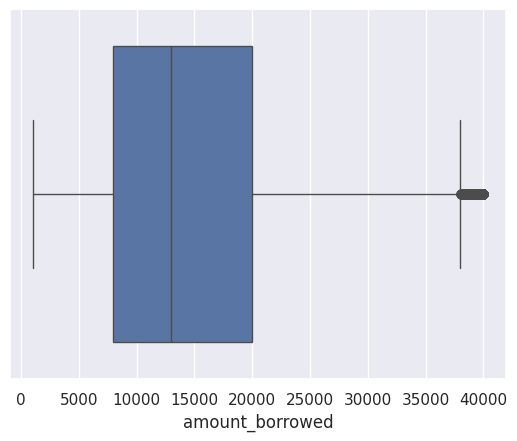

In [81]:
sns.boxplot(x=df['amount_borrowed'])

Key Takeaways:

The boxplot shows the distribution of loan amounts borrowed. As we can see above, most loans falls within around 8,000 to 20,000. The median loan amount is approximately 14,000 meaning half of the loans are below 14,000 and the other half is above. The data ranges between 3,000 to 35,000. However, there are several outliers above 35,000 meaning some borrowers take out exceptionally large loans. All in all, the data is right skewed where a small number of high-loan outliers but most loans are within the range.

### Bivariate Analysis (4pts)
The bivariate analysis begins to look at variables in pairs. The most common bivariate analysis is 'correlation', which can be visualized using a heatmap or a scatterplot.

A regression with only two variables produces the line of best fit you are used to seeing in Excel, and the correlation coefficient!

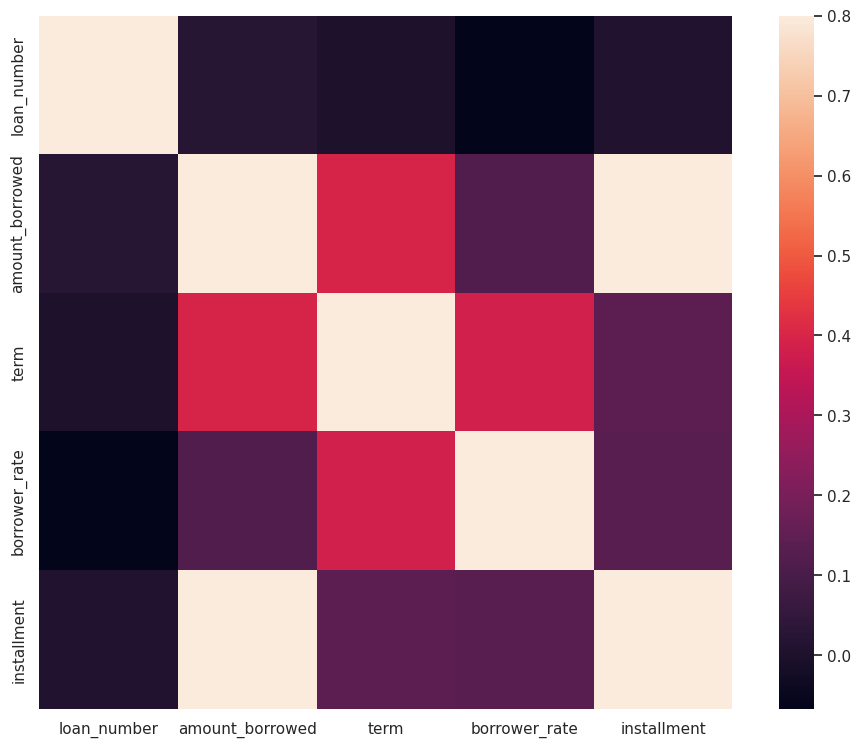

In [82]:
#correlation matrix
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

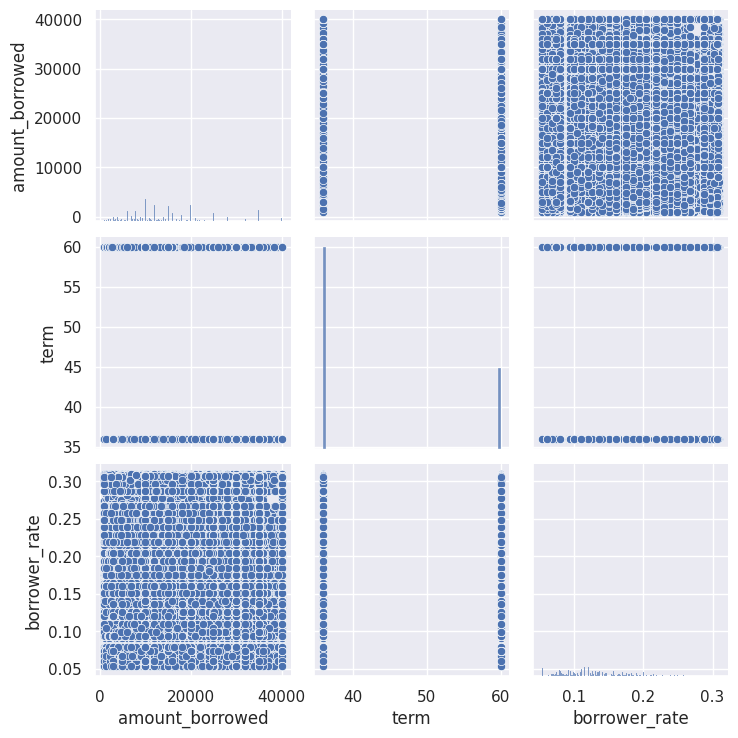

In [83]:
#scatterplot
sns.set()
# cols = ['amount_borrowed', 'term', 'borrower_rate', 'installment', 'grade', 'listing_title', 'loan_status_description']
cols = ['amount_borrowed','term','borrower_rate', 'grade', 'listing_title']
sns.pairplot(df[cols])
plt.show();

By looking at the heatmap and the scatterplot above, what conclusion can you draw?  Name the pairs with high correlations that jump out. Explain why the relationships exist.

**Highly Correlated Pairs:**
1. **Amount Borrowed & Installment** has a strong positive correlation (indicated by the light color in the heatmap) because higher loan amounts naturally lead to higher installment payments as installements are calculated based on loan amount, interest rate, and term.
2. **Term & Amount Borrowed** has strong correlation (indicated by the light color in the heatmap and vertical clusters in the scatterplot) because longer loan terms (60 months) tend to be associated with higher loan amounts, as larger loans usually require more time to repay.
3. **Term & Borrower Rate** has noticeable correlation (lighter in the heatmap) because longer loan terms often have higher interest rates to compensate for the increased default risk over time.


**Overall Conclusion:**
Other than the high correlations, the heatmap and scatterplot show that term has fixed values, while borrower rate and amount borrowed vary.  Also, the distinct vertical clustering for term indicates that it is not a continuous variable, unlike borrower_rate and amount_borrowed.

## Data Preparation

This is the part where we make changes to the dataset so that it can feed nicely into the Machine Learning Models.
Data cleaning usually involves at least one of the below processes:
Dealing with inconsistent recording
* Removing unwanted observations
* Removing duplicates
* Investigating outliers
* Dealing with missing items


### Cleaning up the date columns

Remember there was a warning message when we import the file?  Dates should be imported into the dataframe as data type 'datetime' instead of 'object'.  Let's clean up this dataset by transforming all dates to 'datetime' format.

In [84]:
df['origination_date'] = pd.to_datetime(df['origination_date'])

In [86]:
# Now check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961527 entries, 0 to 1961526
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   loan_number              int64         
 1   amount_borrowed          float64       
 2   term                     int64         
 3   borrower_rate            float64       
 4   installment              float64       
 5   grade                    object        
 6   origination_date         datetime64[ns]
 7   listing_title            object        
 8   loan_status_description  object        
 9   data_source              object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 149.7+ MB


### Handling Missing Data
There are a few options in dealing with missing data.  We could simply drop the row, given the dataset is large enough. Otherwise, you can consider some form of data imputation to address the problem:
* Mean substitution
* Regression with multiple imputation
* Full information maximum likelihood

There are Python packages that can assist you with data imputation, but we will not get into that.

In [87]:
df.isnull().sum()

,0
loan_number,0
amount_borrowed,0
term,0
borrower_rate,0
installment,0
grade,0
origination_date,0
listing_title,0
loan_status_description,0
data_source,0


All the missing data comes from 'listing_title'.  What will you do?  Should you replace missing value with something like 'unknown'? or do you remove these rows?  

For the training of machine learning models, you want to retain as much data as possible.

In [88]:
# We will replace all the 'NaN's in the column 'listing_title'
df['listing_title'] = df['listing_title'].fillna('unknown')

In [89]:
df['listing_title'].value_counts()

,count
listing_title,
debt_consolidation,1117683
credit_card,441191
home_improvement,131802
other,121040
major_purchase,43492
medical,23836
small_business,20703
car,20305
vacation,13488


### Keeping only useful rows

In [90]:
# Let us examine the target column "loan_status_description"

df['loan_status_description'].value_counts()

,count
loan_status_description,
CURRENT,968311
COMPLETED,788945
CHARGEOFF,202993
DEFAULTED,1278


If we only want the Machine Learning model to predict whether a loan will be 'completed' or 'defaulted', the other status in our target column may be removed or recategorized.

What do you think is the best course of action?

Current means the loan is currently on going, it may not provide much value in the training.  
Chargeoff is a bad loan, it is sold to collection agencies.  You may want to consider groupping this with the Defaulted.
I honestly don't know what Cancelled means, but since they are minority, I will just remove them.


In [91]:
# First let's rename 'CHARGEOFF' to 'DEFAULTED'

df['loan_status_description'].replace('CHARGEOFF','DEFAULTED',inplace=True)

<ipython-input-91-18b32da681f1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_status_description'].replace('CHARGEOFF','DEFAULTED',inplace=True)


In [92]:
# Then we only keep intances where the loan status is 'completed' or 'defaulted'

df_filtered = df.loc[df['loan_status_description'].isin(['COMPLETED','DEFAULTED'])]

In [93]:
df_filtered['loan_status_description'].value_counts()

,count
loan_status_description,
COMPLETED,788945
DEFAULTED,204271


In [94]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993216 entries, 0 to 1961508
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   loan_number              993216 non-null  int64         
 1   amount_borrowed          993216 non-null  float64       
 2   term                     993216 non-null  int64         
 3   borrower_rate            993216 non-null  float64       
 4   installment              993216 non-null  float64       
 5   grade                    993216 non-null  object        
 6   origination_date         993216 non-null  datetime64[ns]
 7   listing_title            993216 non-null  object        
 8   loan_status_description  993216 non-null  object        
 9   data_source              993216 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 83.4+ MB


### Removing features that may not be useful (8pts)

Decision Tree is one of the most widely-used ML algorithms.  It can handle both continuous and categorical data.  However, it cannot process 'datetime', unless we transform 'datetime' into a numerical value like age, or categrical value like seasons or year.  For my example here, I will remove the 'origination_dates' to keep things simple.  You may play with some feature engineering if you wish to see whether that can improve the model.  
We also need to convert categorical variables into numerical 'levels'.  The codes are provided for you below:



In [95]:
# Please remove the datetime columns and other irrelavent columns

df_filtered = df_filtered.drop(columns=['loan_number', 'origination_date', 'data_source'])

In [96]:
df_filtered.head()

,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,27050.0,36,0.1099,885.46,B,debt_consolidation,COMPLETED
1,4800.0,36,0.1099,157.13,B,home_improvement,COMPLETED
2,12000.0,36,0.0762,373.94,A,debt_consolidation,COMPLETED
3,12000.0,36,0.1199,398.52,B,debt_consolidation,COMPLETED
4,12000.0,36,0.0662,368.45,A,debt_consolidation,COMPLETED


### Data transformation

In [97]:
# Decision tree cannot process categorical variables that are strings(objects).
# We need to transform them into numerical levels using a library called LabelEncoder.

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_filtered['grade'] = labelencoder.fit_transform(df_filtered['grade'])
df_filtered['listing_title'] = labelencoder.fit_transform(df_filtered['listing_title'])

# 0 = good, 1 = default
df_filtered['loan_status_description'] = labelencoder.fit_transform(df_filtered['loan_status_description'])

In [98]:
# Let check the transformation
df_filtered.head()

,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,27050.0,36,0.1099,885.46,1,2,0
1,4800.0,36,0.1099,157.13,1,4,0
2,12000.0,36,0.0762,373.94,0,2,0
3,12000.0,36,0.1199,398.52,1,2,0
4,12000.0,36,0.0662,368.45,0,2,0


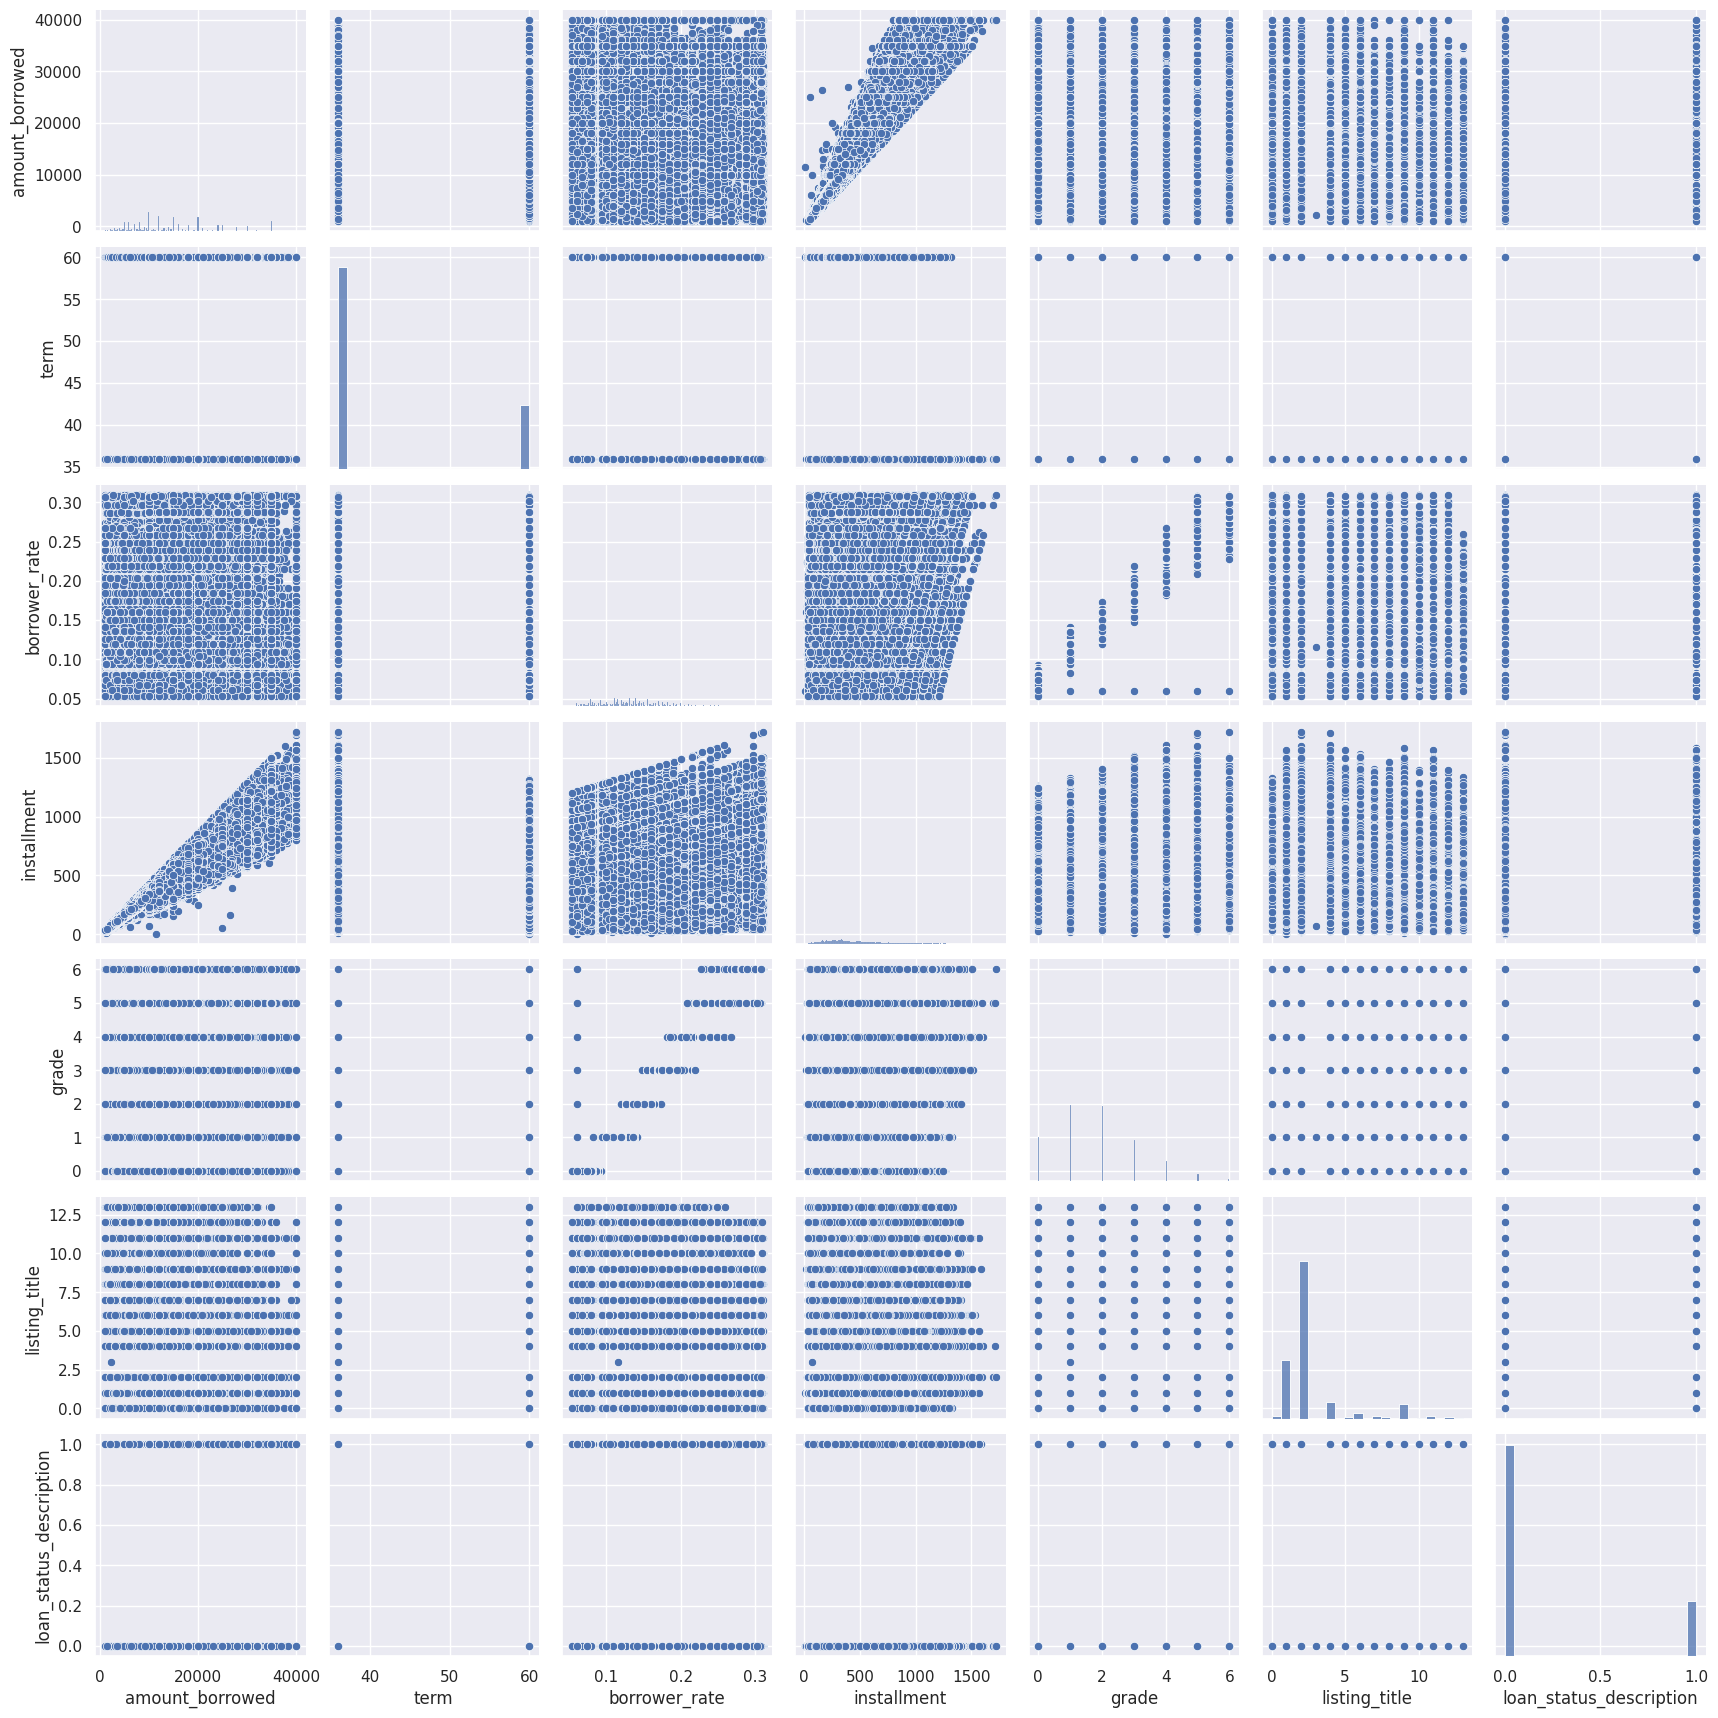

In [99]:
# Now let's try the scatterplot again.  We can see the categorical variables showing now.
sns.set()
cols = ['amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'listing_title',
       'loan_status_description']
sns.pairplot(df_filtered[cols])
plt.show();

## Splitting data into training data and test data

'loan_status_description' will be our 'target' for the Machine Learning model to learn from and predict.
Before we feed the clean dataset into the model, we will split the dataset into training data and testing data.  The ML model will train on the training dataset and we will observe the model accuracy by feeding test data into the model for predicted targets.

In general, we will split the dataset 70/30.  70% of data will be used as training data and 30% for testing.  

Although the Prosper dataset is not considered "Imbalanced", most bankruptcy/bad debt data is imbalanced, i.e only a small percentage of data is bankrupt.  We need to make sure that both the training and testing dataset has the same proportion of bankruptcy.
![image-2.png](attachment:image-2.png)

In [44]:
# import the libraries that help us split the dataset

from sklearn.model_selection import train_test_split

In [45]:
# After you drop columms, make sure the column index matches
# features from column 1 to 6, target in column 7 (Remember! Index position starts with 0)

x, y = df_filtered.iloc[:, 0:5], df_filtered.iloc[:,6]

In [46]:
# We will do a 70/30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [47]:
# 0=completed, 1=defaulted
# let's look at the target distribuiton in the test group

y_test.value_counts()

,count
loan_status_description,
0,182107
1,46136


In [48]:
# let's look at the target distribuiton in the training group

y_train.value_counts()

,count
loan_status_description,
0,424915
1,107652


In [49]:
# let's look at the features in the training group

x_train.head()

,amount_borrowed,term,borrower_rate,installment,grade
190730,18000.0,36.0,0.1499,623.89,2
196402,35000.0,36.0,0.0949,1120.99,1
286099,12000.0,60.0,0.1699,298.17,3
189897,12000.0,36.0,0.0749,373.22,0
425292,5600.0,36.0,0.1199,185.98,2


In [50]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

That's it, the ML model is trained.  We will then test it with the test data to see how good it is.

## Evaluation
### Model performance (15pts)

In [51]:
#Predict the response using test dataset

predictions = clf.predict(x_test)

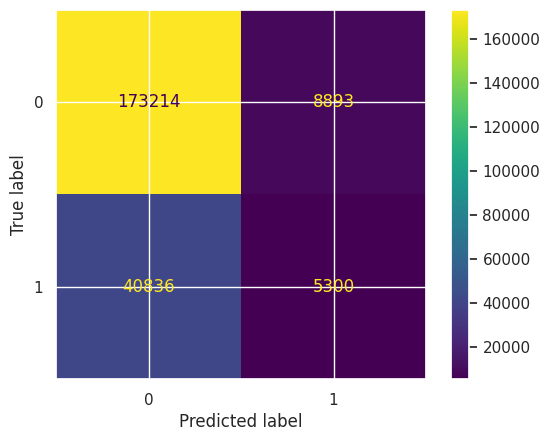

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [53]:
# You can calculate the confusion matrix with code

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

In [54]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.11487775273105601
0.9511660726935264


How do you intepret this result?  

Do you think your ML Model is a good one? Why or why not?

Please make three suggestions on improving the model.

* From the sensitivity, we know that the model is struggling to correctly identify loan defaults. The sensitivity shows that the model is only correct 11.5% of the time to detect the "bad loans"

* On the other hand, the specificity result tells us that the model can accurately classifies 95.1% of non-defaulted loans. That means the model is good at predicting which loans will be completed sucessfully but struggles with identifying defaults.

* From the confusion matrix, we can see that the model falsely predicted 40,936 cases as non-defaults. This is bad as it might lead lenders to approve riskier loans and lead to financial losses. Another important point is that the model incorrectly predicted 8,893 cases as defaults. This is also bad as it cause lenders to reject potentially good borrowers.

-----------------------------------------------

No, it is not a good ML model as it inaccurately predicts loan defaults which will lead lenders to approve riskier loans and lead to financial losses

-----------------------------------------------

Three Suggestions:
* Give more data to train the AI model, the bigger the dataset, the more accurate the model
* Include more variables which might give more information for the model such as previous late payments, debt-income ratio, etc
* Try out different ML Algorithms such as Linear Regression, Random Forest, etc